# Проверка гипотез для увеличения выручки интернет-магазина

**Задачи проекта:**

1. Приоритизация гипотез по увеличению выручки интернет-магазина
2. Проведение A/B-теста 
3. Анализ результатов

# Описание данных

**Данные для первой части**

*Файл /datasets/hypothesis.csv*

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

*Файл /datasets/orders.csv*

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

*Файл /datasets/visitors.csv*

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

## Часть 1. Приоритизация гипотез.

### Предобработка данных

Изучим таблицу с представленными гипотезами

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 1
display(hypothesis)
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


Приведем названия столбцов к нижнему регистру.

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()

Таблица представленна корректно, переходим к приоритизации гипотез.

### ICE

In [4]:
hypothesis['ice'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
display(hypothesis.sort_values(by='ice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### RICE

In [5]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis.sort_values(by='rice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Вывод:**

Различие в результатах приоритизации гипотез методами ICE и RICE заключается в том, что в первом случае не учитывается охват пользователей, которых затронет проверка гипотезы.
По результатам приоритизации гипотезы с индексами 0 и 7 в обоих случаях попали в "топ-3". Рекомендуется в первую очередь проверить гипотезу с индексом 7, т.к. при примерно равных показателях сложности и уверенности она затронет больше пользователей, а значит результат будет более точным.

## Часть 2. Анализ А/В теста.

### Предобработка данных

In [6]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Проверим таблицу на дубликаты, изменим наименования столбцов и формат даты.

In [7]:
orders.duplicated().sum()

0

In [8]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

Проверим, есть ли в таблице orders пользователи, оказавшиеся одновременно в двух группах.

In [9]:
users_in_both_groups = orders.groupby('visitor_id', as_index=False)['group'].agg('nunique')

users_in_both_groups = users_in_both_groups.query('group == 2')
users_in_both_groups['visitor_id'].count()

58

58 пользователей оказались одновременно в группах А и В. Удалим данные о заказах этих пользователей.

In [10]:
orders = orders[~orders['visitor_id'].isin(users_in_both_groups['visitor_id'])].reset_index(drop=True)

In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 39.8+ KB


In [12]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
orders.duplicated().sum()

0

Проверим таблицу на дубликаты и изменим формат даты.

In [14]:
visitors.duplicated().sum()

0

In [15]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Данные подготовлены к работе.

### Кумулятивная выручка по группам

Соберём агрегированные кумулятивные по дням данные о заказах и о посетителях интернет-магазина.

In [16]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     23      19      142779   719     
1 2019-08-01  B     17      17      59758    713     
2 2019-08-02  A     42      36      234381   1338    
3 2019-08-02  B     40      39      221801   1294    
4 2019-08-03  A     66      60      346854   1845    


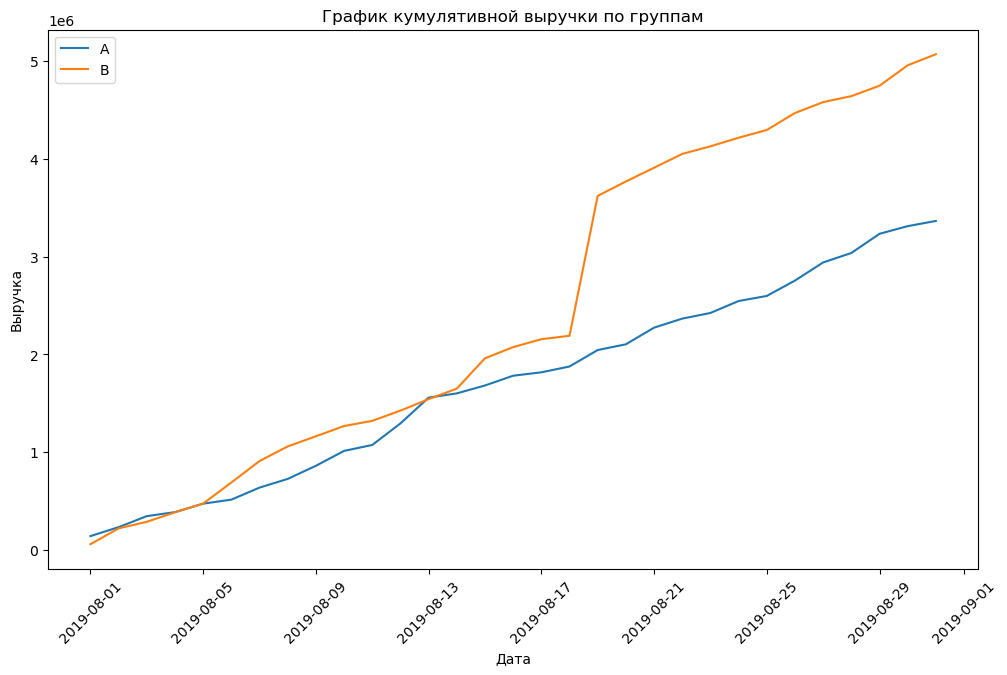

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,7))

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.legend()
plt.xticks(rotation=45)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

**Вывод:**

Выручка почти равномерно увеличивается в течение всего теста. В группе В наблюдается резкий рост выручки в районе 18-19 августа, вероятнее всего это выброс. Возможно он связан с аномально большой суммой заказа пользователя из этой группы или общим большим числом заказов в этот день. Выручка в обеих группах накапливается примерно одинаково, наблюдается небольшое преобладание группы В, но судить о нем рано.

### Кумулятивный средний чек по группам

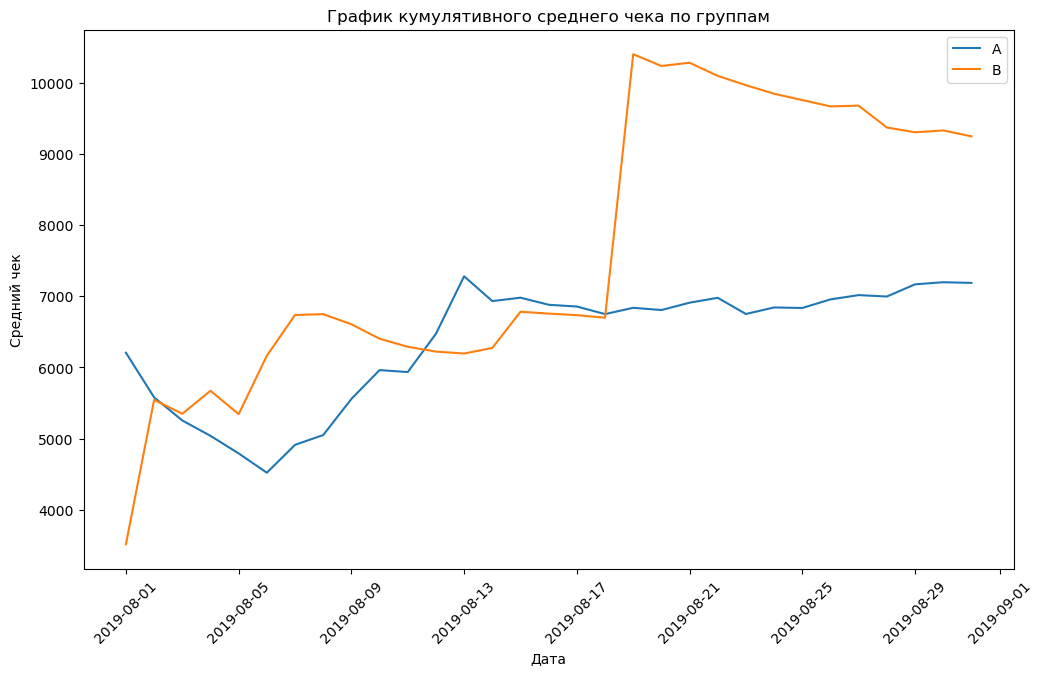

In [18]:
plt.figure(figsize=(12,7))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

**Вывод:**

Средний чек для группы А устанавливается с минимальным отклонением примерно после двух недель теста, предварительно он равен примерно 7000. На средний чек в группе В выбросы повлияли сильнее, особенно тот, который мы видели на графике кумулятивной выручки за 18-19 августа. Дать оценку среднему чеку для обеих групп по такому графику не предоставляется возможным, необходимо избавиться от выбросов.

### Относительное изменение кумулятивного среднего чека группы B к группе A

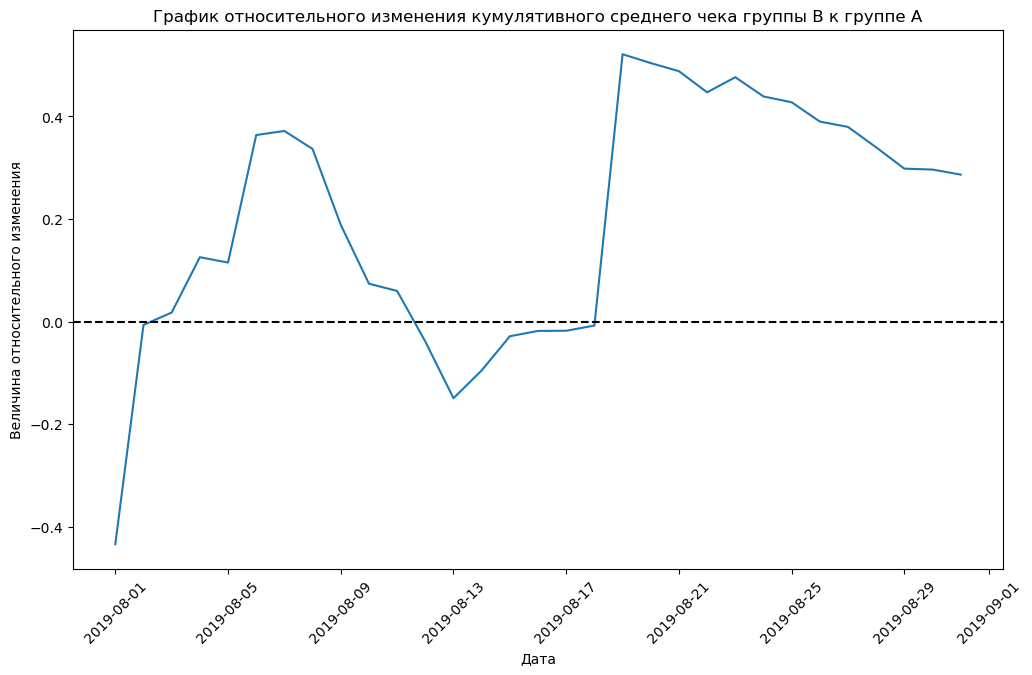

In [19]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left',\
                                                       suffixes=['_a', '_b'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,7))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])\
         /(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Величина относительного изменения')
plt.show()

**Вывод:**

График несколько раз пересекает нулевую линию и имеет большой разбег от -0,4 до 0,5. В основном график выше нулевой линии, что означает о лучших показателях группы В. Но выводы на данном этапе делать рано, сначала необходимо избавиться от выбросов.

### Кумулятивное среднее количество заказов на посетителя по группам

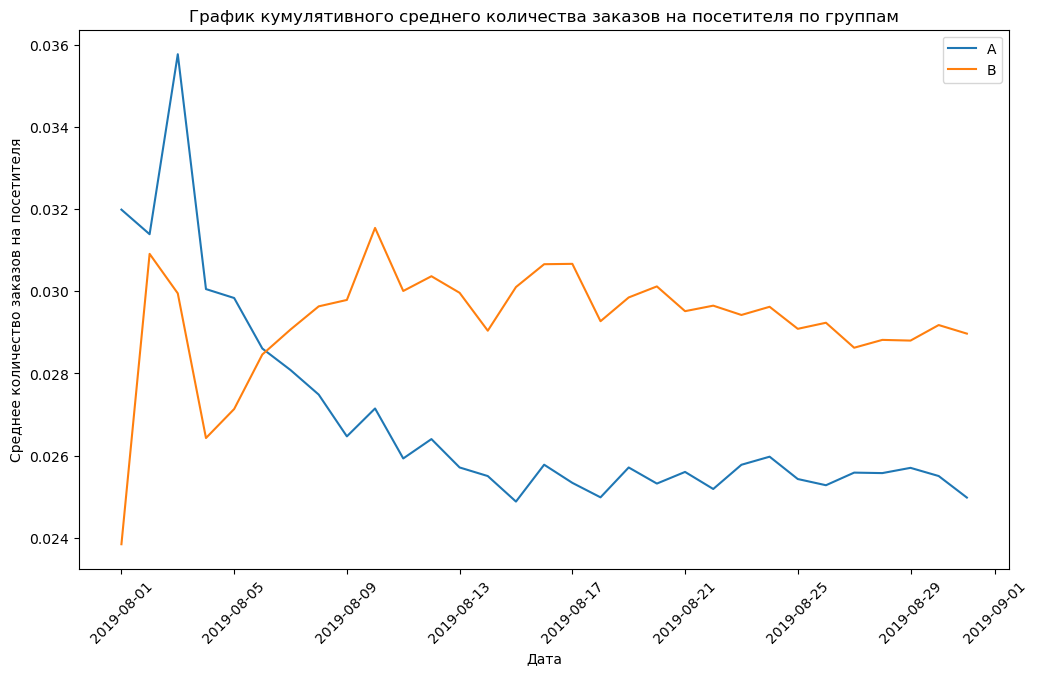

In [20]:
# считаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(12,7))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.show()

**Вывод:**

Кумулятивное среднее количество заказов на посетителя в группе В стабильно выше, чем в группе А начиная с 7-го дня проведения теста.

### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

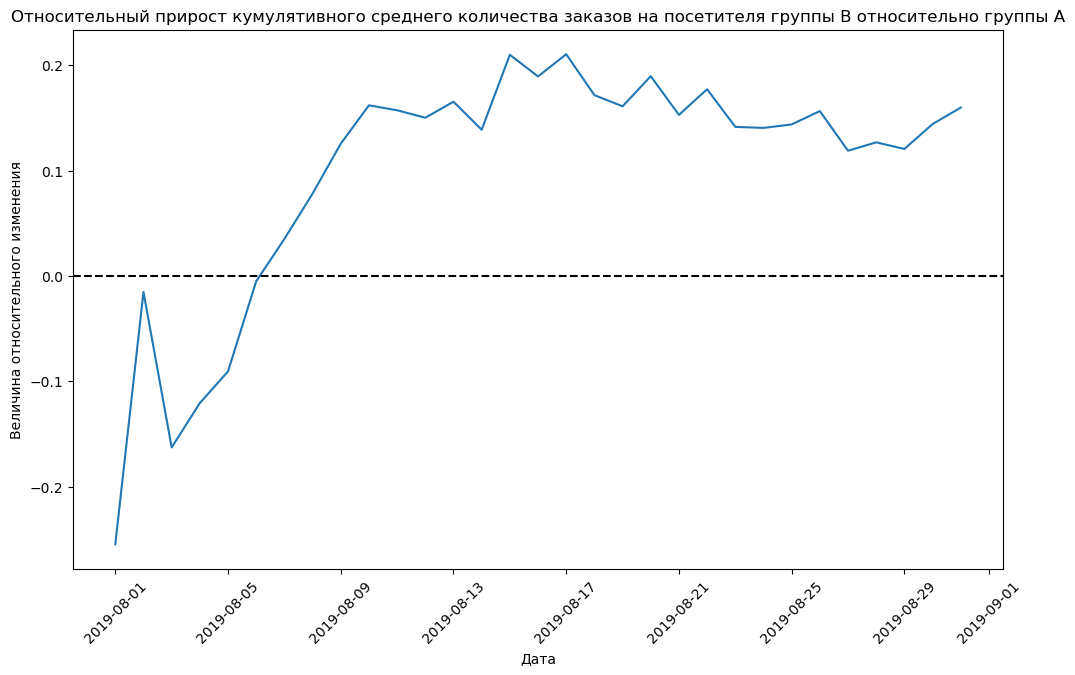

In [21]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']]\
.merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

plt.figure(figsize=(12,7))
plt.plot(merged_cumulative_conversions['date'],\
         merged_cumulative_conversions['conversion_b']/merged_cumulative_conversions['conversion_a']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.title("Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.xlabel('Дата')
plt.ylabel('Величина относительного изменения')
plt.show()

**Вывод:**

Начиная с 3-го дня проведения теста среднее количество заказов в группе В растет относительно группы А и в последние 2 недели проведения теста колеблется в пределах 10-20%.

### Точечный график количества заказов по пользователям

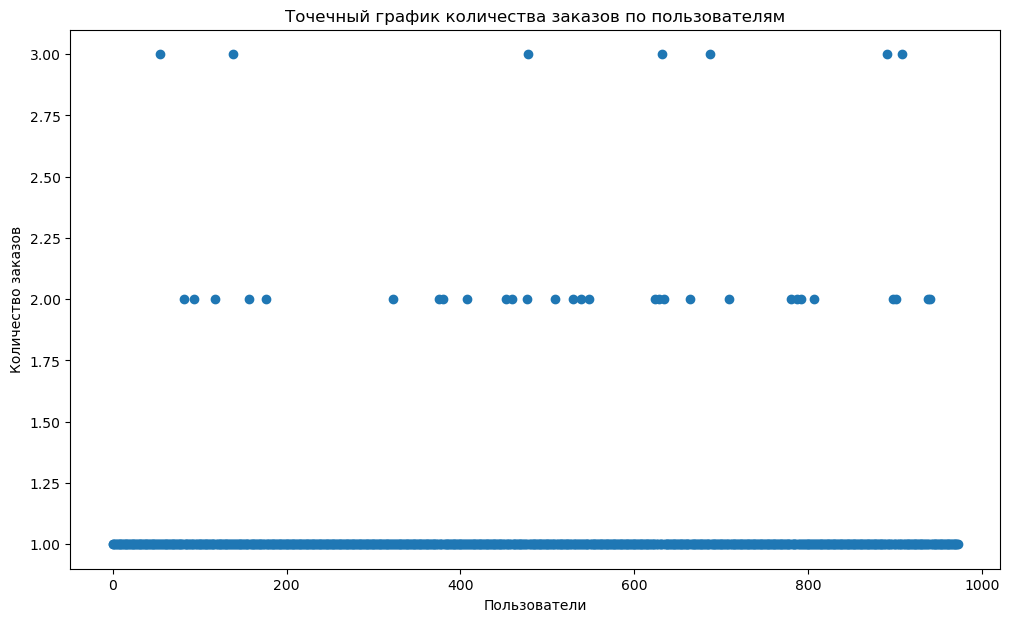

In [22]:
orders_by_visitors = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_visitors.columns = ['visitor_id', 'orders']

x_values = pd.Series(range(0,len(orders_by_visitors)))

plt.figure(figsize=(12,7))
plt.scatter(x_values, orders_by_visitors['orders'])

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

**Вывод:**

Подавляющая часть пользователей сделали один заказ, достаточно большАя часть - 2 заказа. Их точная доля не ясна — необходимо поосчитать перцентили количества заказов на одного пользователя.

### Перцентили количества заказов на пользователя

In [23]:
print(np.percentile(orders_by_visitors['orders'], [95, 99])) 

[1. 2.]


**Вывод:**

Не более 5% пользователей оформляли больше чем 1 заказ, 2 и более заказов делали ~1-4% пользователей.
Выберем 1 заказ на одного пользователя за верхнюю границу числа заказов, тех кто сделал больше одного заказа будем считать аномалией.

### Точечный график стоимостей заказов

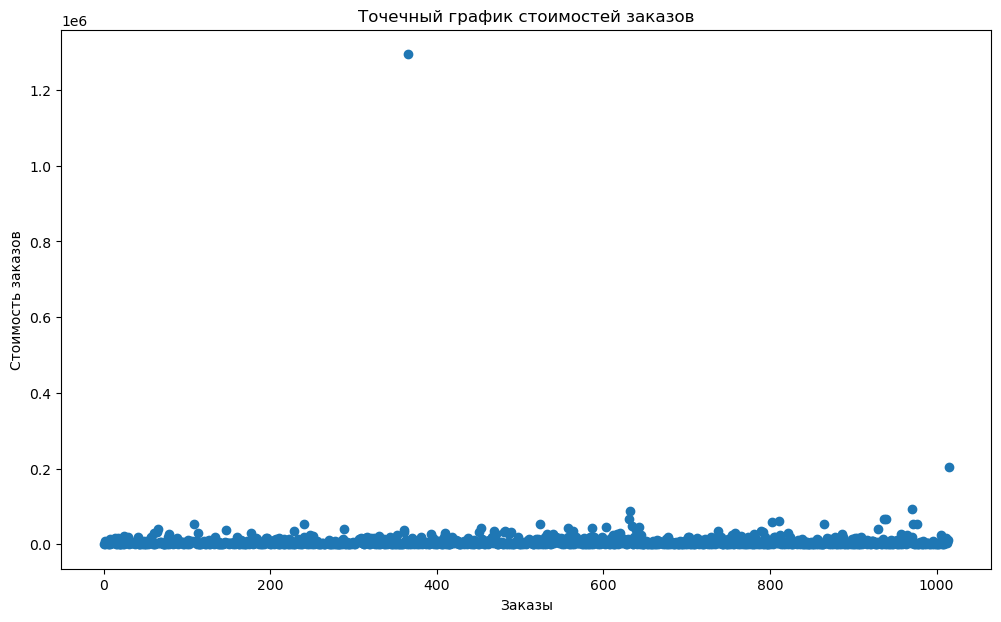

In [24]:
x_values = pd.Series(range(0,len(orders)))

plt.figure(figsize=(12,7))
plt.scatter(x_values, orders['revenue'])

plt.title('Точечный график стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.show()

Увеличим масштаб графика, не показывая явно выделяющиеся аномальныо большие значения.

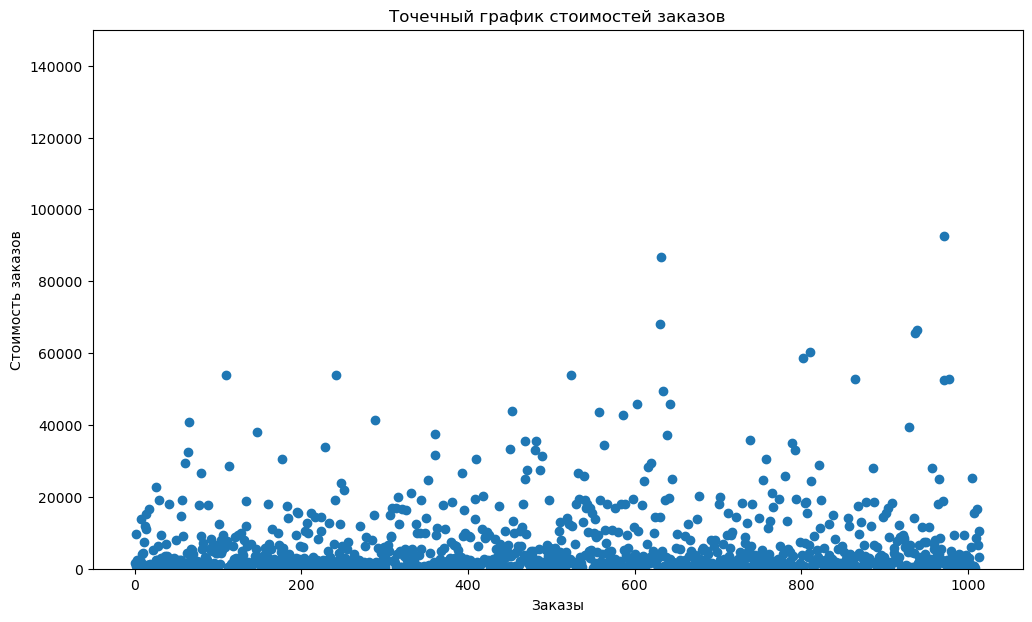

In [25]:
plt.figure(figsize=(12,7))
plt.scatter(x_values, orders['revenue'])

plt.title('Точечный график стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.ylim([0,150000])
plt.show()

**Вывод:**

На графике отчетливо выделяется один заказ, влияние которого мы видели на графиках кумулятивного среднего чека и кумулятивной выручки. Это явный выброс, который сильно влияет на анализ исследования. Практически все остальные заказы сливаются в одну область и для того чтобы определить верхнюю границу "нормальной" стоимости заказа необходимо посчитать перцентили.

### Перцентили стоимости заказов

In [26]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


**Вывод:**

Не более 5% заказов имеют стоимость более 26785, выберем эту сумму за верхнюю границу стоимости заказа, все что выше - будем считать аномалией.

###  Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

**Сформулируем гипотезы.** 

**Нулевая:** различий в среднем количестве заказов между группами нет. 

**Альтернативная:** различия в среднем количестве заказов между группами есть.

Начнем с подготовки данных. Создадим таблицу data, где:

* **date** — дата;
* **ordersPerDateA** — количество заказов в выбранную дату в группе A;
* **revenuePerDateA** — суммарная выручка в выбранную дату в группе A;
* **ordersPerDateB** — количество заказов в выбранную дату в группе B;
* **revenuePerDateB** — суммарная выручка в выбранную дату в группе B;
* **ordersCummulativeA** — суммарное число заказов до выбранной даты включительно в группе A;
* **revenueCummulativeA** — суммарная выручка до выбранной даты включительно в группе A;
* **ordersCummulativeB** — суммарное количество заказов до выбранной даты включительно в группе B;
* **revenueCummulativeB** — суммарная выручка до выбранной даты включительно в группе B;
* **visitorsPerDateA** — количество пользователей в выбранную дату в группе A;
* **visitorsPerDateB** — количество пользователей в выбранную дату в группе B;
* **visitorsCummulativeA** — количество пользователей до выбранной даты включительно в группе A;
* **visitorsCummulativeB** — количество пользователей до выбранной даты включительно в группе B.

Ранее мы расчиатли кумулятивные данные, разобьем их для удобства на две таблицы: для группы А и для группы В и оставим только необходимые столбцы.

In [27]:
cumulative_data_a = cumulative_data.query('group == "A"')
cumulative_data_a = cumulative_data_a.drop(['group', 'buyers', 'conversion'], axis=1)
cumulative_data_a.columns = ['date', 'transactions_cummulative_a', 'revenue_cummulative_a', 'visitors_cummulative_a']

cumulative_data_b = cumulative_data.query('group == "B"')
cumulative_data_b = cumulative_data_b.drop(['group', 'buyers', 'conversion'], axis=1)
cumulative_data_b.columns = ['date', 'transactions_cummulative_b', 'revenue_cummulative_b', 'visitors_cummulative_b']

In [28]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

transactions_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
transactions_a_daily.columns = ['date', 'transactions_per_date_a', 'revenue_per_date_a']


transactions_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
transactions_b_daily.columns = ['date', 'transactions_per_date_b', 'revenue_per_date_b']

data = (
    transactions_a_daily.merge(
        transactions_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(cumulative_data_a, left_on='date', right_on='date', how='left')
    .merge(cumulative_data_b, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,transactions_per_date_a,revenue_per_date_a,transactions_per_date_b,revenue_per_date_b,transactions_cummulative_a,revenue_cummulative_a,visitors_cummulative_a,transactions_cummulative_b,revenue_cummulative_b,visitors_cummulative_b,visitors_per_date_a,visitors_per_date_b
0,2019-08-01,23,142779,17,59758,23,142779,719,17,59758,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,1338,40,221801,1294,619,581
2,2019-08-03,24,112473,14,67049,66,346854,1845,54,288850,1803,507,509
3,2019-08-04,11,41176,14,96890,77,388030,2562,68,385740,2573,717,770
4,2019-08-05,22,86383,21,89908,99,474413,3318,89,475648,3280,756,707


Выберем уровень статистической значимости, равный 0,05.

Для проверки гипотез используем критерий Манна-Уитни.

In [29]:
transactions_by_visitor_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
transactions_by_visitor_a.columns = ['visitor_id', 'transactions']

transactions_by_visitor_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
transactions_by_visitor_b.columns = ['visitor_id', 'transactions']

sample_a = pd.concat(
    [
        transactions_by_visitor_a['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(transactions_by_visitor_a['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        transactions_by_visitor_b['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(transactions_by_visitor_b['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)

print("p-value: {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("Относительный прирост: {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p-value: 0.011
Относительный прирост: 0.160


**Вывод:**

По «сырым» данным наблюдаем различие в среднем числе заказов групп A и B.

Первое число — p-value = 0.011 меньше выбранного уровня статистической значимости (0,05). Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, можно отвергнуть. Относительный выигрыш группы B равен 16%.

###  Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**Сформулируем гипотезы.** 

**Нулевая:** различий в среднем чеке между группами нет. 

**Альтернативная:** различия в среднем чеке между группами есть.

In [30]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
Относительный прирост: 0.287


**Вывод:**

По «сырым» данным различие в среднем чеке заказов групп A и B не наблюдается.

Первое число — p-value = 0.829 значительно больше 0.05. Значит нет оснований отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет. 
При этом относительный выигрыш группы B равен 28.7%.

###  Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 26785 (на основе выводов, сделанных при подсчете перцентелей). Объединим их в таблице abnormal_visitors. Посчитаем количество аномальных пользователей.

In [31]:
visitors_with_many_orders = pd.concat(
    [
        transactions_by_visitor_a[transactions_by_visitor_a['transactions'] > int(np.percentile(orders_by_visitors['orders'], [95]))]['visitor_id'],
        transactions_by_visitor_b[transactions_by_visitor_b['transactions'] > int(np.percentile(orders_by_visitors['orders'], [95]))]['visitor_id'],
    ],
    axis=0,
)
visitors_with_expensive_orders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95]))]['visitor_id']
abnormal_visitors = (
    pd.concat([visitors_with_many_orders, visitors_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_visitors.head(5))
print('Количество аномальных пользователей:', abnormal_visitors.shape[0])

487    113298937
937    148427295
792    204675465
33     249864742
586    358944393
Name: visitor_id, dtype: int64
Количество аномальных пользователей: 86


Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 

In [32]:
sample_a_filtered = pd.concat(
    [
        transactions_by_visitor_a[
            np.logical_not(transactions_by_visitor_a['visitor_id'].isin(abnormal_visitors))
        ]['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(transactions_by_visitor_a['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        transactions_by_visitor_b[
            np.logical_not(transactions_by_visitor_b['visitor_id'].isin(abnormal_visitors))
        ]['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(transactions_by_visitor_b['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)

print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительный прирост: {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

p-value: 0.016
Относительный прирост: 0.174


**Вывод:**

По «очищенным» (так же как и по «сырым») данным наблюдаем различие в среднем числе заказов групп A и B.

Первое число — p-value = 0.016 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет отвергаем. Относительный выигрыш группы B равен 17.4%.

###  Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [33]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_visitors)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.727
Относительный прирост: -0.034


**Вывод:**

По «очищенным» (так же как и по «сырым») данным различие в среднем чеке заказов групп A и B не наблюдается.

Первое число — p-value = 0.727 значительно больше 0.05. Значит нет оснований отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами нет. 
Группа B показала себя хуже группы А на 3.4%.

##  Решение по результатам теста

Остановить тест, зафиксировать победу группы B. 

При том, что средний чек оказался незначительно ниже чем в группе А (всего на 3.4%), количество заказов на посетителя выросло на 17.4%. Гипотезы были подготовлены с целью увеличения выручки - рост количества заказов на покупателя при неизменном среднем чеке соответствует достижению этой цели.

##  Общие выводы по результатам теста

* Выявлено статистически значимое различие по среднему количеству заказов между группами, **количество заказов в группе В выше на 17.4%**;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия среднего количества заказов между группами сообщает, что результаты группы B стабильно выше результатов группы A начиная с 7-го дня теста;
* В течение месяца основная масса пользователей делает не более одного заказа. Сумма заказа не превышает ~27000 в 95% случаев;

Исходя из обнаруженных фактов, **тест следует остановить и признать его успешным.**

При том, что **средний чек** оказался **незначительно ниже** чем в группе А (всего **на 3.4%**), **количество заказов** на посетителя **выросло на 17.4%**.

Гипотезы были подготовлены **с целью увеличения выручки** - **рост количества заказов** на покупателя при неизменном среднем чеке **соответствует достижению этой цели**.